<img src="https://5.imimg.com/data5/SELLER/Default/2023/8/337752118/SN/EM/XT/193855926/porter-truck-delivery-services.png" width="1000">

### About Porter 🚛

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers.

Porter works with a wide range of restaurants for delivering their items directly to the people.

- - -

### Business Problem 💡

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

- - - 

### Dataset 📊

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below:

| Feature                    | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| **market_id**              | integer id for the market where the restaurant lies                         |
| **created_at**             | the timestamp at which the order was placed                                 |
| **actual_delivery_time**   | the timestamp when the order was delivered                                  |
| **store_primary_category** | category for the restaurant                                                 |
| **order_protocol**         | integer code value for order protocol (how the order was placed i.e., through porter, call to restaurant, pre-booked, third party, etc.) |
| **total_items**            | subtotal final price of the order                                           |
| **num_distinct_items**     | the number of distinct items in the order                                   |
| **min_item_price**         | price of the cheapest item in the order                                     |
| **max_item_price**         | price of the costliest item in the order                                    |
| **total_onshift_partners** | number of delivery partners on duty at the time order was placed            |
| **total_busy_partners**    | number of delivery partners attending to other tasks                        |
| **total_outstanding_orders** | total number of orders to be fulfilled at the moment                      |

- - -

#### Importing Required Libraries 🤝

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings('ignore')

In [35]:
sns.set(style="darkgrid")
bi_palette = ["#4878ff", "#ffde01"]
three_set_palette = ["#4878ff", "#072a98", "#ffde01"]
four_set_palette = ["#4878ff", "#fdfef0", "#ffde01", "#072a98"]

#### Read Dataset 🔍

In [36]:
df = pd.read_csv('../data/dataset.csv')
df.sample(5)

market_id           created_at actual_delivery_time  \
113769        4.0  2015-01-27 20:07:15  2015-01-27 20:40:34   
163235        4.0  2015-02-11 00:47:27  2015-02-11 01:23:41   
68335         2.0  2015-02-02 01:43:56  2015-02-02 02:53:03   
108477        1.0  2015-02-16 02:03:10  2015-02-16 04:28:33   
150242        3.0  2015-02-04 03:31:19  2015-02-04 04:04:02   

                                store_id store_primary_category  \
113769  a3f390d88e4c41f2747bfa2f1b5f87db                  other   
163235  a86c450b76fb8c371afead6410d55534                mexican   
68335   4734ba6f3de83d861c3176a6273cac6d                  greek   
108477  8d317bdcf4aafcfc22149d77babee96d                chinese   
150242  882735cbdfd9f810814d17892ae50023                dessert   

        order_protocol  total_items  subtotal  num_distinct_items  \
113769             3.0            1      1300                   1   
163235             5.0            3      1725                   3   
68335              5.0            2      2597                   2   
108477             4.0            9     10555                   8   
150242             1.0            3      4385                   3   

        min_item_price  max_item_price  total_onshift_partners  \
113769             975             975                    71.0   
163235             195             685                    25.0   
68335             1199            1299                    75.0   
108477             595            1495                     0.0   
150242            1095            1695                    30.0   

        total_busy_partners  total_outstanding_orders  
113769                 69.0                     123.0  
163235                 23.0                      23.0  
68335                  76.0                     120.0  
108477                  0.0                       0.0  
150242                 27.0                      27.0

In [37]:
print("Shape of the data: ", df.shape)
print("The Given Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Columns: ", df.columns.to_list())
print("Order date ranges from {} to {}".format(df['created_at'].min(), df['created_at'].max()))

Shape of the data:  (197428, 14)
The Given Dataset has 197428 rows and 14 columns
Columns:  ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
Order date ranges from 2014-10-19 05:24:15 to 2015-02-18 06:00:44


### 🕵🏽‍♂️ Shape and Structure:

* The dataset comprises 197,428 rows and 14 columns, representing a substantial volume of delivery data. 
* Each row in this file corresponds to one unique delivery.
* Data is provided for the time period of 2014-10-19 05:24:15 and 2015-02-18 06:00:44

In [38]:
df.duplicated().sum()

0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [40]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

### 🕵🏽‍♂️ Dataset Information:

* **Duplicates**: They is no duplicate row present in the given dataset 
* **Data Consistency**: All columns have the different non-null count, indicating missing values in the dataset.
* **Data Types**: Columns are classified into integer, float and object types.

### Data Preprocessing

In [41]:
# Data Cleaning
print(f"No. of record missing actual delivery time: {df['actual_delivery_time'].isna().sum()}")
df = df.dropna(subset=['actual_delivery_time'])

No. of record missing actual delivery time: 7


In [42]:
# Handling Missing Values
df['market_id'] = df['market_id'].fillna(df['market_id'].mode()[0])
df['market_id'] = df['market_id'].astype(int)

df['order_protocol'] = df['order_protocol'].fillna(df['order_protocol'].mode()[0])
df['order_protocol'] = df['order_protocol'].astype(int)

df['store_primary_category'] = df['store_primary_category'].fillna('other')

df['total_onshift_partners'] = df['total_onshift_partners'].fillna(0)
df['total_busy_partners'] = df['total_busy_partners'].fillna(0)
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(0)

df['total_onshift_partners'] = df['total_onshift_partners'].astype(int)
df['total_busy_partners'] = df['total_busy_partners'].astype(int)
df['total_outstanding_orders'] = df['total_outstanding_orders'].astype(int)

In [43]:
# Feature Engineering

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Extract the delivery time from the created_at and actual_delivery_time
df['delivery_time'] = df['actual_delivery_time'] - df['created_at']
df['delivery_time'] = df['delivery_time'].dt.total_seconds() / 60

# Extract the day of the week and hour of the day
df['order_hour'] = df['created_at'].dt.hour
df['order_day'] = df['created_at'].dt.dayofweek

# Calculate available partners
df['available_partners'] = df['total_onshift_partners'] - df['total_busy_partners']


### 🕵🏽‍♂️ Handling Missing Value:

- **actual_delivery_time**: Actual delivery time is missing in 7 records, hence dropping those records.
- **market_id / order_protocol**: Missing values in these columns are imputed with the most frequent value.
- **store_primary_category**: Filled with 'Other'.
- **total_onshift_partners / total_busy_partners / total_outstanding_orders**: Imputed with zeros.

### Data Visualization and Cleaning 📊

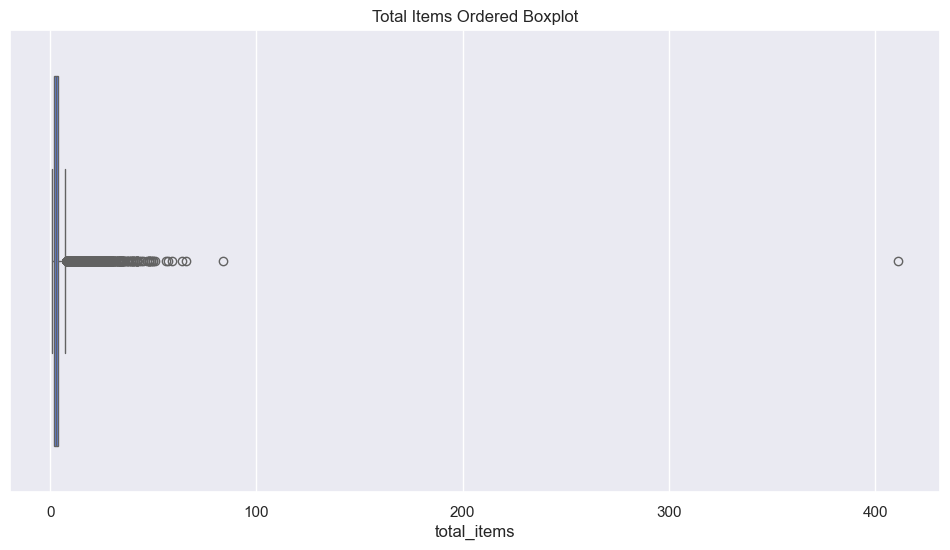

count    197421.000000
mean          3.196367
std           2.666552
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_items', data=df, color=bi_palette[0])
plt.title('Total Items Ordered Boxplot')
plt.show()

df['total_items'].describe()

In [46]:
# Remove outliers - Z-Score
mean = np.mean(df['total_items'])
std_dev = np.std(df['total_items'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
df['z_score'] = (df['total_items'] - mean) / std_dev

# Define the threshold
threshold = 3

# Identify outliers
outliers = df[np.abs(df['z_score']) > threshold]

print(outliers['total_items'].min(), outliers['total_items'].max())

df.drop(['z_score'], axis=1, inplace=True)

Mean: 3.1963671544567194
Standard Deviation: 2.666544875793508
12 411


In [47]:
# Remove the outliers based on IQR
Q1 = df['total_items'].quantile(0.25)
Q3 = df['total_items'].quantile(0.75)
IQR = Q3 - Q1

print("Lower Bound: ", Q1 - 1.5 * IQR)
print("Upper Bound: ", Q3 + 1.5 * IQR)

Lower Bound:  -1.0
Upper Bound:  7.0


In [48]:
t_df = df['total_items'].value_counts().sort_index().reset_index()
t_df.columns = ['total_items', 'count']
t_df[t_df['total_items'] > 30]['count'].sum()

75

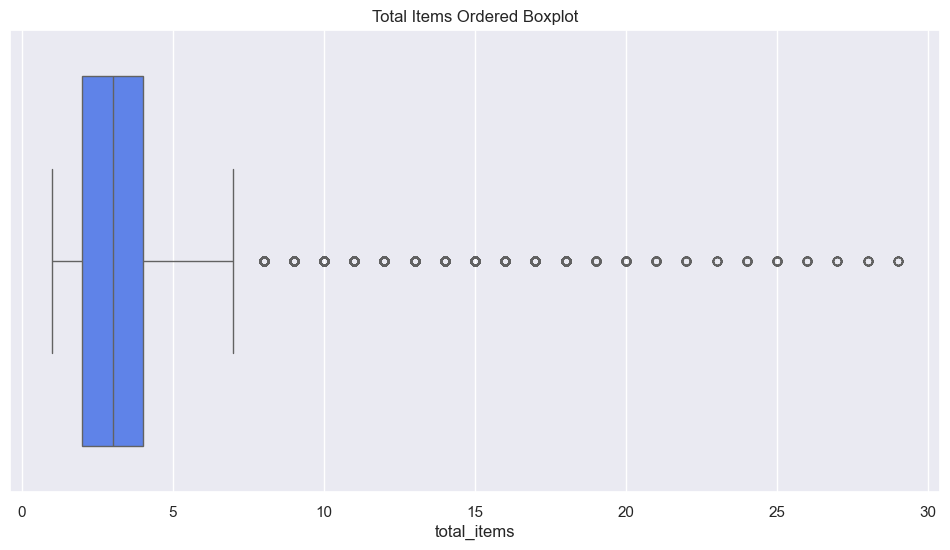

In [49]:
df = df[df['total_items'] < 30]
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_items', data=df, color=bi_palette[0])
plt.title('Total Items Ordered Boxplot')
plt.show()

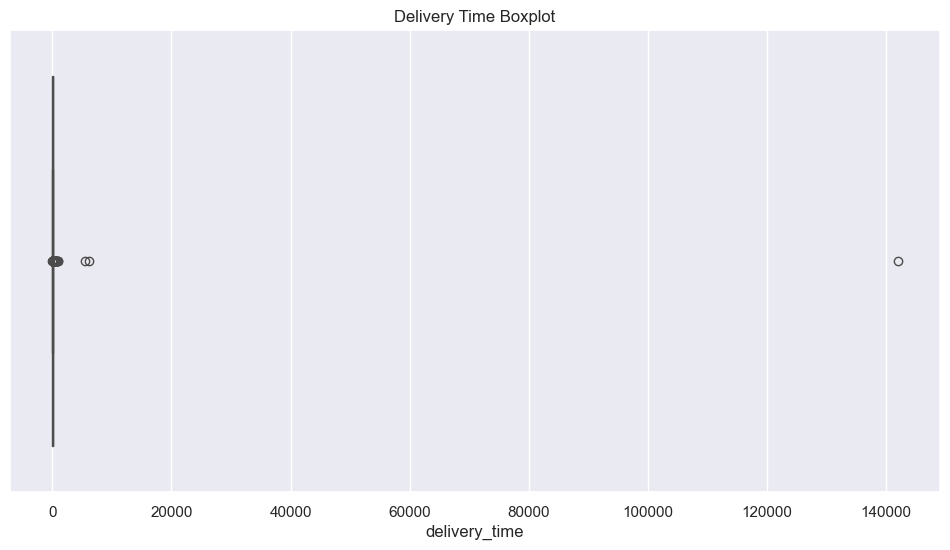

count    197331.000000
mean         48.469600
std         320.566264
min           1.683333
25%          35.066667
50%          44.333333
75%          56.350000
max      141947.650000
Name: delivery_time, dtype: float64

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='delivery_time', data=df)
plt.title('Delivery Time Boxplot')
plt.show()
df['delivery_time'].describe()

Orders with delivery time more than 60 minutes:  39235
Percentage of Orders with delivery time more than 60 minutes:  19.88283645245805
--------------------------------------------------
Orders with delivery time more than 90 minutes:  5643
Percentage of Orders with delivery time more than 90 minutes:  2.8596621919515943
--------------------------------------------------
Orders with delivery time more than 120 minutes:  1090
Percentage of Orders with delivery time more than 120 minutes:  0.552371396283402
--------------------------------------------------
Orders with delivery time more than 180 minutes:  138
Percentage of Orders with delivery time more than 180 minutes:  0.069933259345972


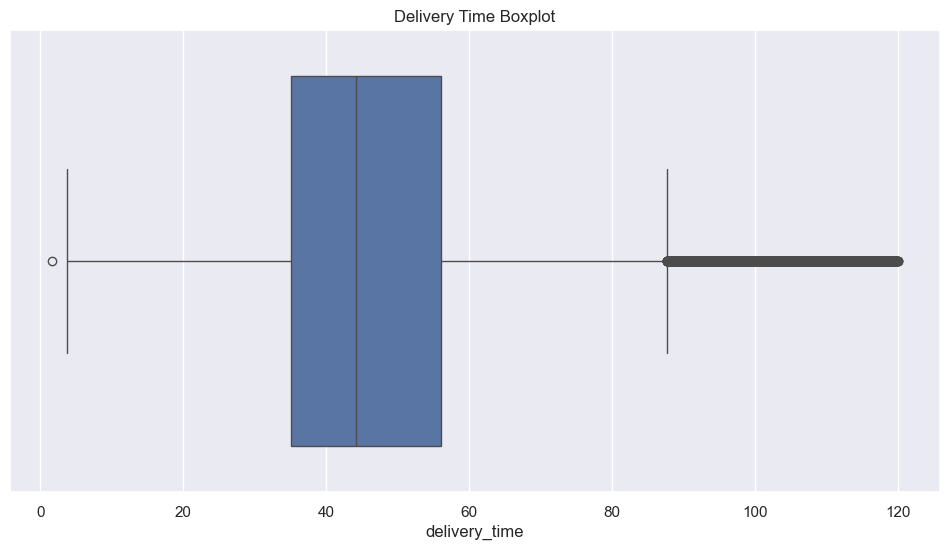

In [51]:
print("Orders with delivery time more than 60 minutes: ", df[df['delivery_time'] >= 60].shape[0])
print("Percentage of Orders with delivery time more than 60 minutes: ", df[df['delivery_time'] >= 60].shape[0] / df.shape[0] * 100)
print("-" * 50)

print("Orders with delivery time more than 90 minutes: ", df[df['delivery_time'] >= 90].shape[0])
print("Percentage of Orders with delivery time more than 90 minutes: ", df[df['delivery_time'] >= 90].shape[0] / df.shape[0] * 100)
print("-" * 50)

print("Orders with delivery time more than 120 minutes: ", df[df['delivery_time'] >= 120].shape[0])
print("Percentage of Orders with delivery time more than 120 minutes: ", df[df['delivery_time'] >= 120].shape[0] / df.shape[0] * 100)
print("-" * 50)

print("Orders with delivery time more than 180 minutes: ", df[df['delivery_time'] >= 180].shape[0])
print("Percentage of Orders with delivery time more than 180 minutes: ", df[df['delivery_time'] >= 180].shape[0] / df.shape[0] * 100)

df = df[df['delivery_time'] < 120]

plt.figure(figsize=(12, 6))
sns.boxplot(x='delivery_time', data=df)
plt.title('Delivery Time Boxplot')
plt.show()

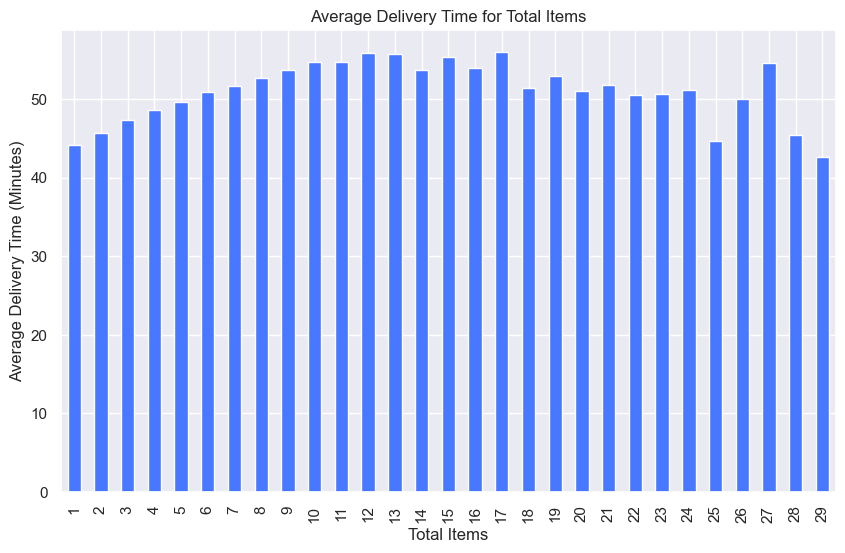

In [52]:
df.groupby(['total_items'])['delivery_time'].mean().plot(kind='bar', figsize=(10, 6), color=bi_palette[0])
plt.title('Average Delivery Time for Total Items')
plt.xlabel('Total Items')
plt.ylabel('Average Delivery Time (Minutes)')
plt.show()

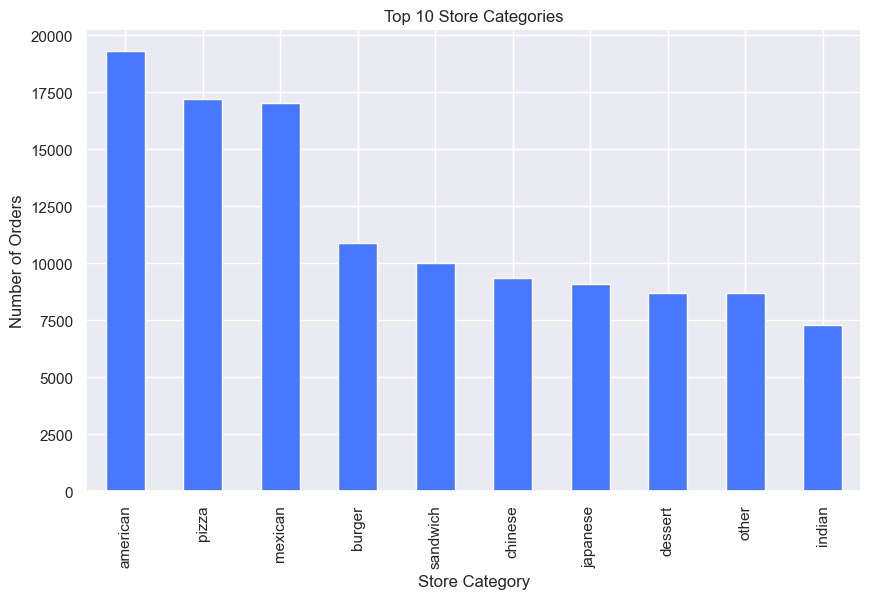

In [53]:
df['store_primary_category'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color=bi_palette[0])
plt.title('Top 10 Store Categories') 
plt.xlabel('Store Category')
plt.ylabel('Number of Orders')
plt.show()

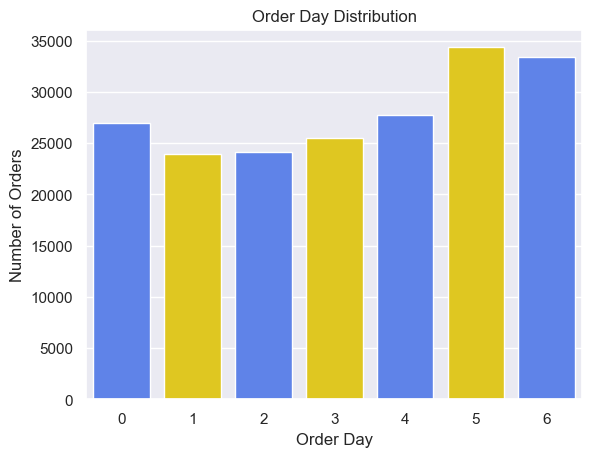

In [54]:
sns.countplot(x='order_day', data=df, palette=bi_palette)
plt.title('Order Day Distribution')
plt.xlabel('Order Day')
plt.ylabel('Number of Orders')
plt.show()

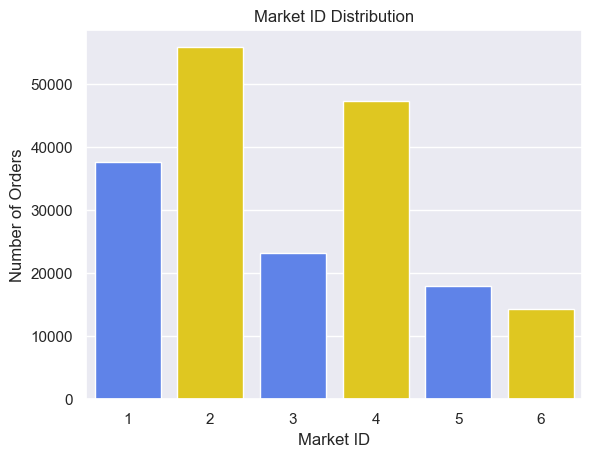

In [20]:
sns.countplot(x='market_id', data=df, palette=bi_palette)
plt.title('Market ID Distribution')
plt.xlabel('Market ID')
plt.ylabel('Number of Orders')
plt.show()

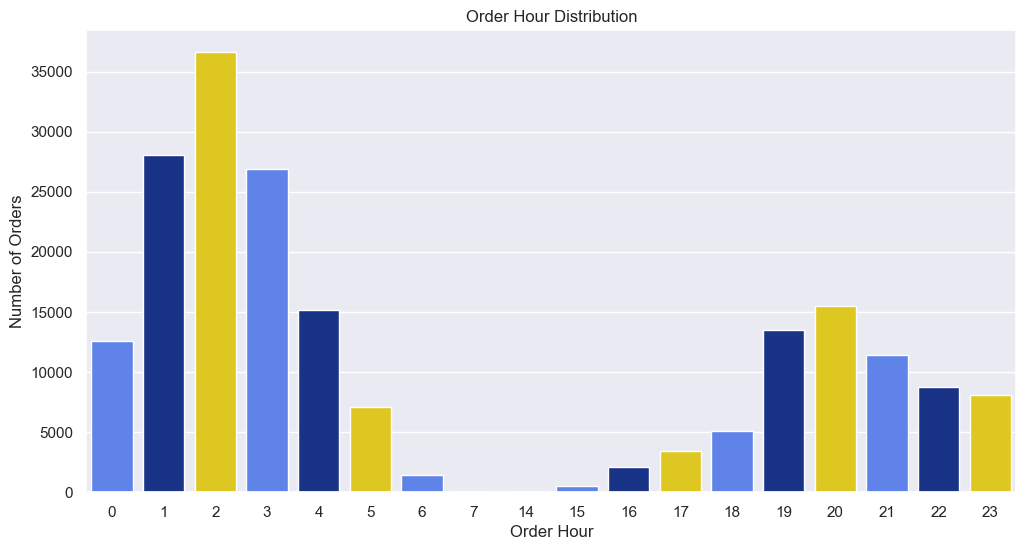

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(x='order_hour', data=df, palette=three_set_palette)
plt.title('Order Hour Distribution')
plt.xlabel('Order Hour')
plt.ylabel('Number of Orders')
plt.show()

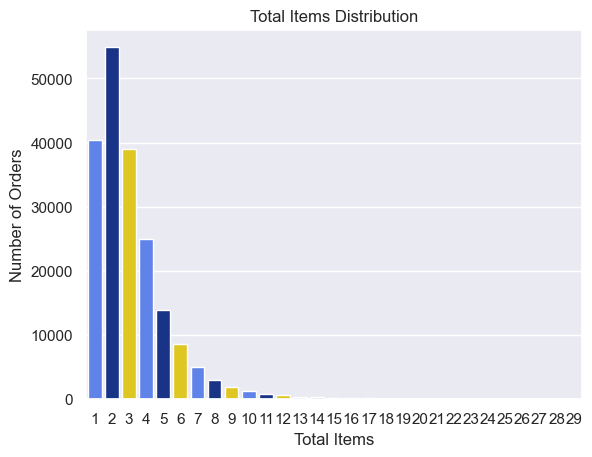

In [23]:
sns.countplot(x='total_items', data=df, palette=three_set_palette)
plt.title('Total Items Distribution')
plt.xlabel('Total Items')
plt.ylabel('Number of Orders')
plt.show()

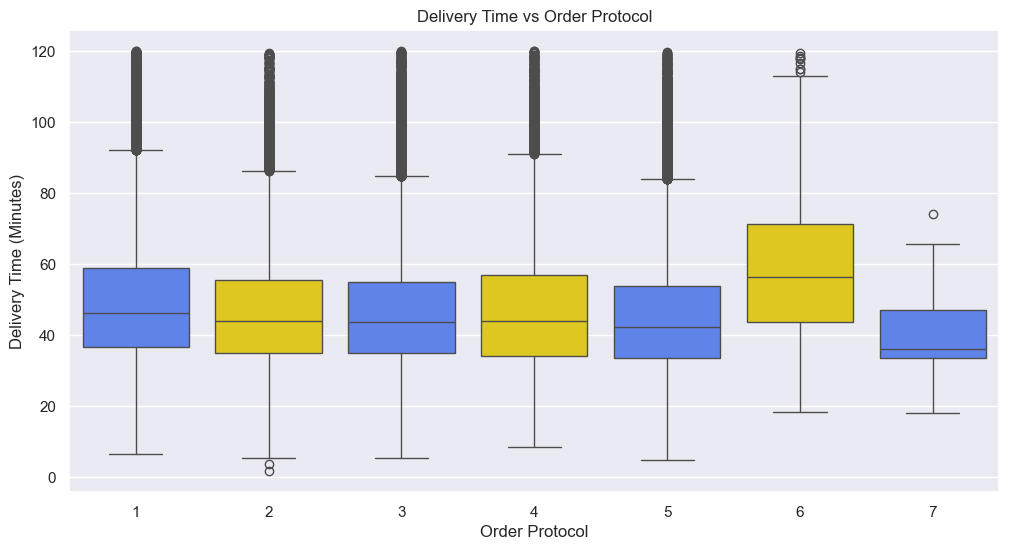

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_protocol', y='delivery_time', data=df, palette=bi_palette)
plt.title('Delivery Time vs Order Protocol')
plt.xlabel('Order Protocol')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

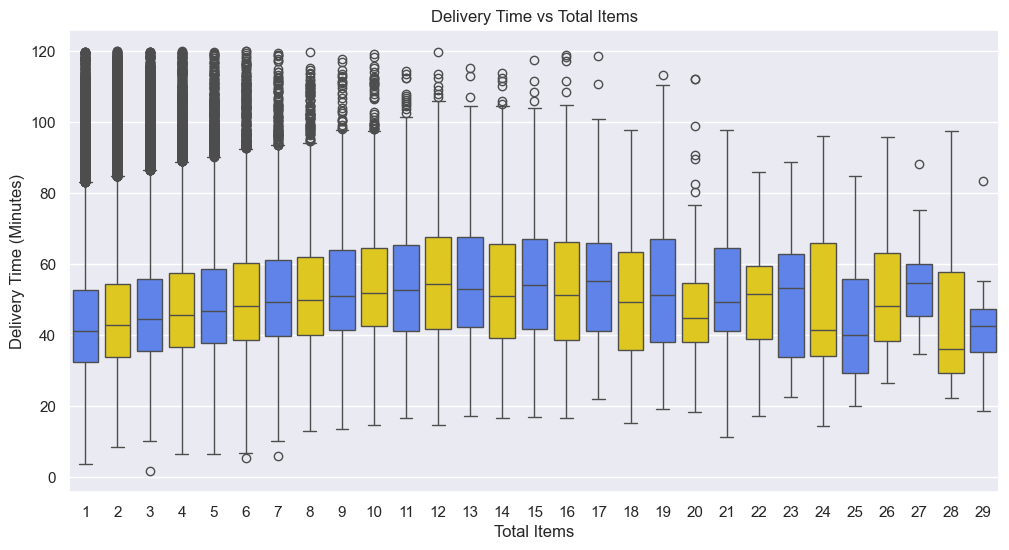

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_items', y='delivery_time', data=df, palette=bi_palette)
plt.title('Delivery Time vs Total Items')
plt.xlabel('Total Items')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

### EDA Analysis 👨‍🔬

- **total_items**: Total items fields has more outlier ranges from 1 to 400+. Based on the manual filtering condition eliminating the records having more than 30 items.
- **delivery_time**: 1090 orders having more than 2 hours delivery time, indicating potential outlier.
- **store_primary_category**: Most of orders are placed in American category followed by Pizza, mexican dishes. Indicating preferred choices of customer.
- Most number of orders are generally placed during weekend
- Orders placed generally place during 0hr to 6hr and 16hr to 23hr
- Number of items: Most of the orders has 2 items, generally range from 1 items to 12 items 

### MRDS Preparation

In [26]:
# Drop columns that are not needed or are timestamps
df = df.drop(columns=['created_at', 'actual_delivery_time', 'store_id'])

In [27]:
# Separate features and target variable
X = df.drop(columns=['delivery_time'])
y = df['delivery_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders', 'order_hour', 'order_day']),
        ('cat_ord', OneHotEncoder(), ['market_id', 'order_protocol']),
        ('cat_high_card', TargetEncoder(), ['store_primary_category'])
    ])

# Apply the transformations
X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_test_transformed = preprocessor.transform(X_test)


In [29]:
def create_model(learning_rate=0.01, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_transformed.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1))  # Output layer for regression
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mean_squared_error')
    return model


In [30]:
# Trying different configurations
learning_rates = [0.01, 0.001]
activations = ['relu', 'tanh']
optimizers = ['adam', 'sgd']
epochs = 100
batch_size = 32

In [31]:

best_model = None
best_loss = float('inf')

for lr in learning_rates:
    for activation in activations:
        for optimizer in optimizers:
            model = create_model(learning_rate=lr, activation=activation, optimizer=optimizer)
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            history = model.fit(X_train_transformed, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose=0)
            val_loss = min(history.history['val_loss'])
            if val_loss < best_loss:
                best_loss = val_loss
                best_model = model
                best_history = history


Epoch 1/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 206.6773 - val_loss: 214.3726
Epoch 2/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 207.0781 - val_loss: 213.6046
Epoch 3/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 208.6119 - val_loss: 216.0162
Epoch 4/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 206.1639 - val_loss: 214.2502
Epoch 5/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 206.2784 - val_loss: 217.8281
Epoch 6/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 207.3243 - val_loss: 214.8597
Epoch 7/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 207.0352 - val_loss: 215.5517
Epoch 8/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 207.6759 - val_loss: 213.1503
Epoch 9/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 206.5524 - val_loss: 213.0868
Epoch 10/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 206.3566 - val_loss: 213.0260
Epoch 11/100
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2

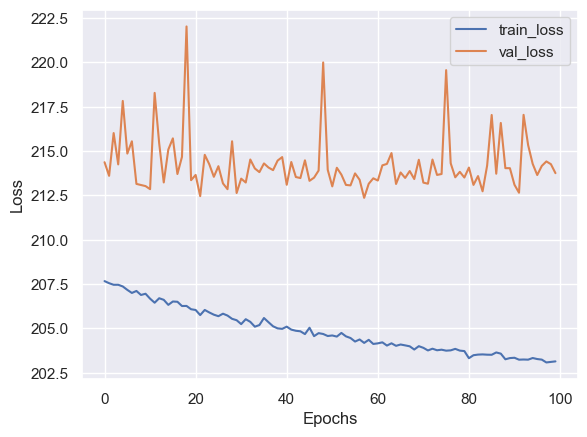

In [32]:
# Model Training
final_model = best_model
history = final_model.fit(X_train_transformed, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)

# Plotting the losses
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model
y_pred = final_model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test MAE: {mae}')


1227/1227 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step
Test MSE: 210.24183364843694
Test RMSE: 14.499718398935785
Test MAE: 11.006912906960366


An RMSE of approximately 14.50 means that on average, the model's predictions are off by about 14.50 minutes. This can be considered high or low depending on the context of the delivery times.

- - -

#### 🧑‍🔬 Questions:

1. Defining the Problem Statements and Use Cases

* **Problem Statement**:
    The primary problem is to estimate the delivery time for orders placed through Porter, considering various factors such as order details, restaurant location, and delivery partner availability.
* **Use Cases**:
    - *Real-time Delivery Time Estimation*: Provide customers with accurate delivery time estimates when they place an order.
    - *Resource Allocation*: Optimize the allocation of delivery partners based on estimated delivery times and current workload.

2. Pandas Datetime Functions

    - *pd.to_datetime()*: Converts a column or series to datetime format.
    - *dt.strftime()*: Formats datetime objects as strings according to a specified format.
    - *dt.total_seconds()*: Returns the total number of seconds in a timedelta object.

3. Short Note on Datetime, Timedelta, Time Span (Period)

    - *Datetime*: Represents a specific point in time, including date and time information (e.g., 2023-10-05 14:30:00).
    - *Timedelta*: Represents the difference between two datetime objects, often used for calculating durations (e.g., 2 days, 3:00:00).
    - *Time Span (Period)*: Represents a span of time, such as a month or a year, and is useful for aggregating data over regular intervals (e.g., 2023-10 for October 2023).

4. Why Check for Outliers in Data?
    - Outliers can significantly skew the results of a model, leading to inaccurate predictions and poor performance. Identifying and handling outliers ensures the model is trained on representative data, improving its robustness and accuracy.

5. Outlier Removal Methods

    - *Z-Score Method*: Removes data points that lie beyond a specified number of standard deviations from the mean.
    - *IQR Method*: Removes data points that lie outside 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile.


6. Classical Machine Learning Methods

    - Linear Regression: Models the relationship between features and the target variable using a linear approach.
    - Decision Tree Regression: Uses a tree-like model of decisions to predict the target variable.
    - Random Forest Regression: An ensemble method that uses multiple decision trees to improve prediction accuracy.


7. Why Scaling is Required for Neural Networks?
    - Scaling ensures that all input features contribute equally to the model's learning process, preventing features with larger ranges from dominating the learning process. It helps in faster convergence and improves the model's performance.
8. Choice of Optimizer
    - *Adam Optimizer*: Combines the advantages of both the AdaGrad and RMSProp algorithms, providing adaptive learning rates for each parameter. It is efficient, requires less memory, and is well-suited for problems with large datasets and high-dimensional parameter spaces.
9. Activation Function Used and Why
    - *ReLU (Rectified Linear Unit)*: Commonly used in hidden layers of neural networks because it introduces non-linearity, allowing the network to learn complex patterns. It also helps mitigate the vanishing gradient problem, enabling faster training.
10. Why Neural Networks Perform Well on Large Datasets
    - Neural networks can capture complex, non-linear relationships in data due to their deep architecture. With large datasets, they have enough data to learn these intricate patterns effectively, leading to better generalization and performance on unseen data.


- - - 